# Predicting Student Admissions with Neural Networks
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy. You can read on the documentation here:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/


In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/zacharywong/NLP/Lab_StudentAdmissions/student_data.csv')

print(data[:10])

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
5      1  760  3.00     2
6      1  560  2.98     1
7      0  400  3.08     2
8      1  540  3.39     3
9      0  700  3.92     2


## Plotting the data

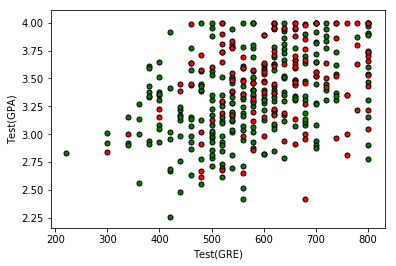

In [11]:
import matplotlib.pyplot as plt

def plot_point(data):
    x = np.array(data[['gre','gpa']])
    y = np.array(data['admit'])
    admitted = x[np.argwhere(y==1)]
    rejected = x[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected],s = 25, color = 'green', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted],s = 25, color = 'red', edgecolor = 'k')
    plt.xlabel('Test(GRE)')
    plt.ylabel('Test(GPA)')
    
plot_point(data)
plt.show()

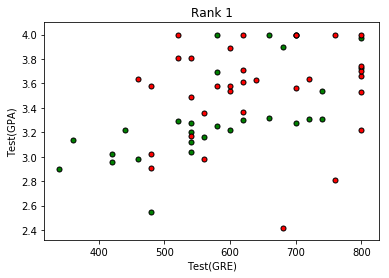

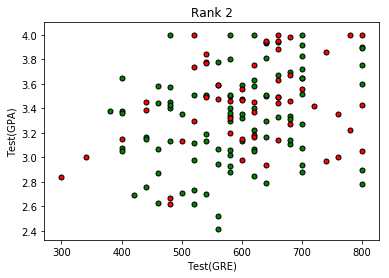

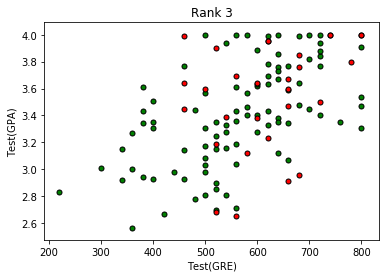

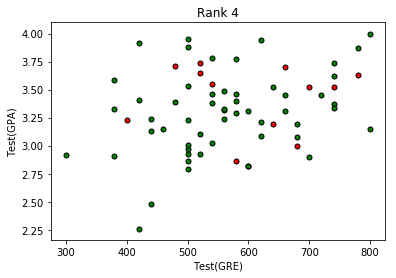

In [13]:
# Separating the ranks
data_rank1 = data[data['rank'] == 1]
data_rank2 = data[data['rank'] == 2]
data_rank3 = data[data['rank'] == 3]
data_rank4 = data[data['rank'] == 4]

plot_point(data_rank1)
plt.title('Rank 1')
plt.show()
plot_point(data_rank2)
plt.title('Rank 2')
plt.show()
plot_point(data_rank3)
plt.title('Rank 3')
plt.show()
plot_point(data_rank4)
plt.title('Rank 4')
plt.show()

## Create dummy variables for rank

In [14]:
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'],prefix = 'rank')], axis = 1)

one_hot_data = one_hot_data.drop(['rank'], axis = 1)

print(one_hot_data[:10])

   admit  gre   gpa  rank_1  rank_2  rank_3  rank_4
0      0  380  3.61       0       0       1       0
1      1  660  3.67       0       0       1       0
2      1  800  4.00       1       0       0       0
3      1  640  3.19       0       0       0       1
4      0  520  2.93       0       0       0       1
5      1  760  3.00       0       1       0       0
6      1  560  2.98       1       0       0       0
7      0  400  3.08       0       1       0       0
8      1  540  3.39       0       0       1       0
9      0  700  3.92       0       1       0       0


## Scaling the data

In [18]:
processed_data = one_hot_data[:]

processed_data['gre'] = processed_data['gre'] / 800
processed_data['gpa'] = processed_data['gpa'] / 4

processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.225625,0,0,1,0
1,1,0.825,0.229375,0,0,1,0
2,1,1.000,0.250000,1,0,0,0
3,1,0.800,0.199375,0,0,0,1
4,0,0.650,0.183125,0,0,0,1
5,1,0.950,0.187500,0,1,0,0
6,1,0.700,0.186250,1,0,0,0
7,0,0.500,0.192500,0,1,0,0
8,1,0.675,0.211875,0,0,1,0
9,0,0.875,0.245000,0,1,0,0


## Splitting the data into Training data and Testing data

In [42]:
sample = np.random.choice(processed_data.index, size = int(len(processed_data)*0.9), replace = False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre       gpa  rank_1  rank_2  rank_3  rank_4
88       0  0.875  0.205000       1       0       0       0
252      1  0.650  0.250000       0       1       0       0
134      0  0.700  0.184375       0       1       0       0
396      0  0.700  0.190000       0       0       1       0
27       1  0.650  0.233750       0       0       0       1
63       1  0.850  0.240625       0       0       1       0
33       1  1.000  0.250000       0       0       1       0
186      0  0.700  0.225625       0       0       1       0
216      0  0.425  0.181250       1       0       0       0
66       0  0.925  0.226250       0       0       0       1
    admit    gre       gpa  rank_1  rank_2  rank_3  rank_4
11      0  0.550  0.201250       1       0       0       0
14      1  0.875  0.250000       1       0       0       0
19      1  0.675  0.238125       1       0       0       0
29      0  0.650  0.205625       1    

## Splitting the data into features and targets

In [43]:
features = train_data.drop('admit', axis = 1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis = 1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

       gre       gpa  rank_1  rank_2  rank_3  rank_4
88   0.875  0.205000       1       0       0       0
252  0.650  0.250000       0       1       0       0
134  0.700  0.184375       0       1       0       0
396  0.700  0.190000       0       0       1       0
27   0.650  0.233750       0       0       0       1
63   0.850  0.240625       0       0       1       0
33   1.000  0.250000       0       0       1       0
186  0.700  0.225625       0       0       1       0
216  0.425  0.181250       1       0       0       0
66   0.925  0.226250       0       0       0       1
88     0
252    1
134    0
396    0
27     1
63     1
33     1
186    0
216    0
66     0
Name: admit, dtype: int64


## Training the 2-layer Neural Network

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def error_formula(y, output):
    return -y*np.log(output) - (1-y)*np.log(1-output)

## Backpropagate the error

In [45]:
def error_term_formula(y, output):
    return (y-output)*output*(1-output)

In [46]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(56)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            #   Notice we calulate f'(h) here instead of defining a separate
            #   sigmoid_prime function. This just makes it faster because we
            #   can re-use the result of the sigmoid function stored in
            #   the output variable
            error_term = error_term_formula(y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.2140578563514866
Epoch: 100
Train loss:  0.20508854877961322
Epoch: 200
Train loss:  0.2035341649777987
Epoch: 300
Train loss:  0.20283165238780457
Epoch: 400
Train loss:  0.2024078582605572
Epoch: 500
Train loss:  0.20209466589455113
Epoch: 600
Train loss:  0.20183142622991046
Epoch: 700
Train loss:  0.20159389172060674
Epoch: 800
Train loss:  0.2013716013122413
Epoch: 900
Train loss:  0.20115973058037612
Finished training!


## Calculating the accuracy on the test data

In [47]:
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.575
